## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'
fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

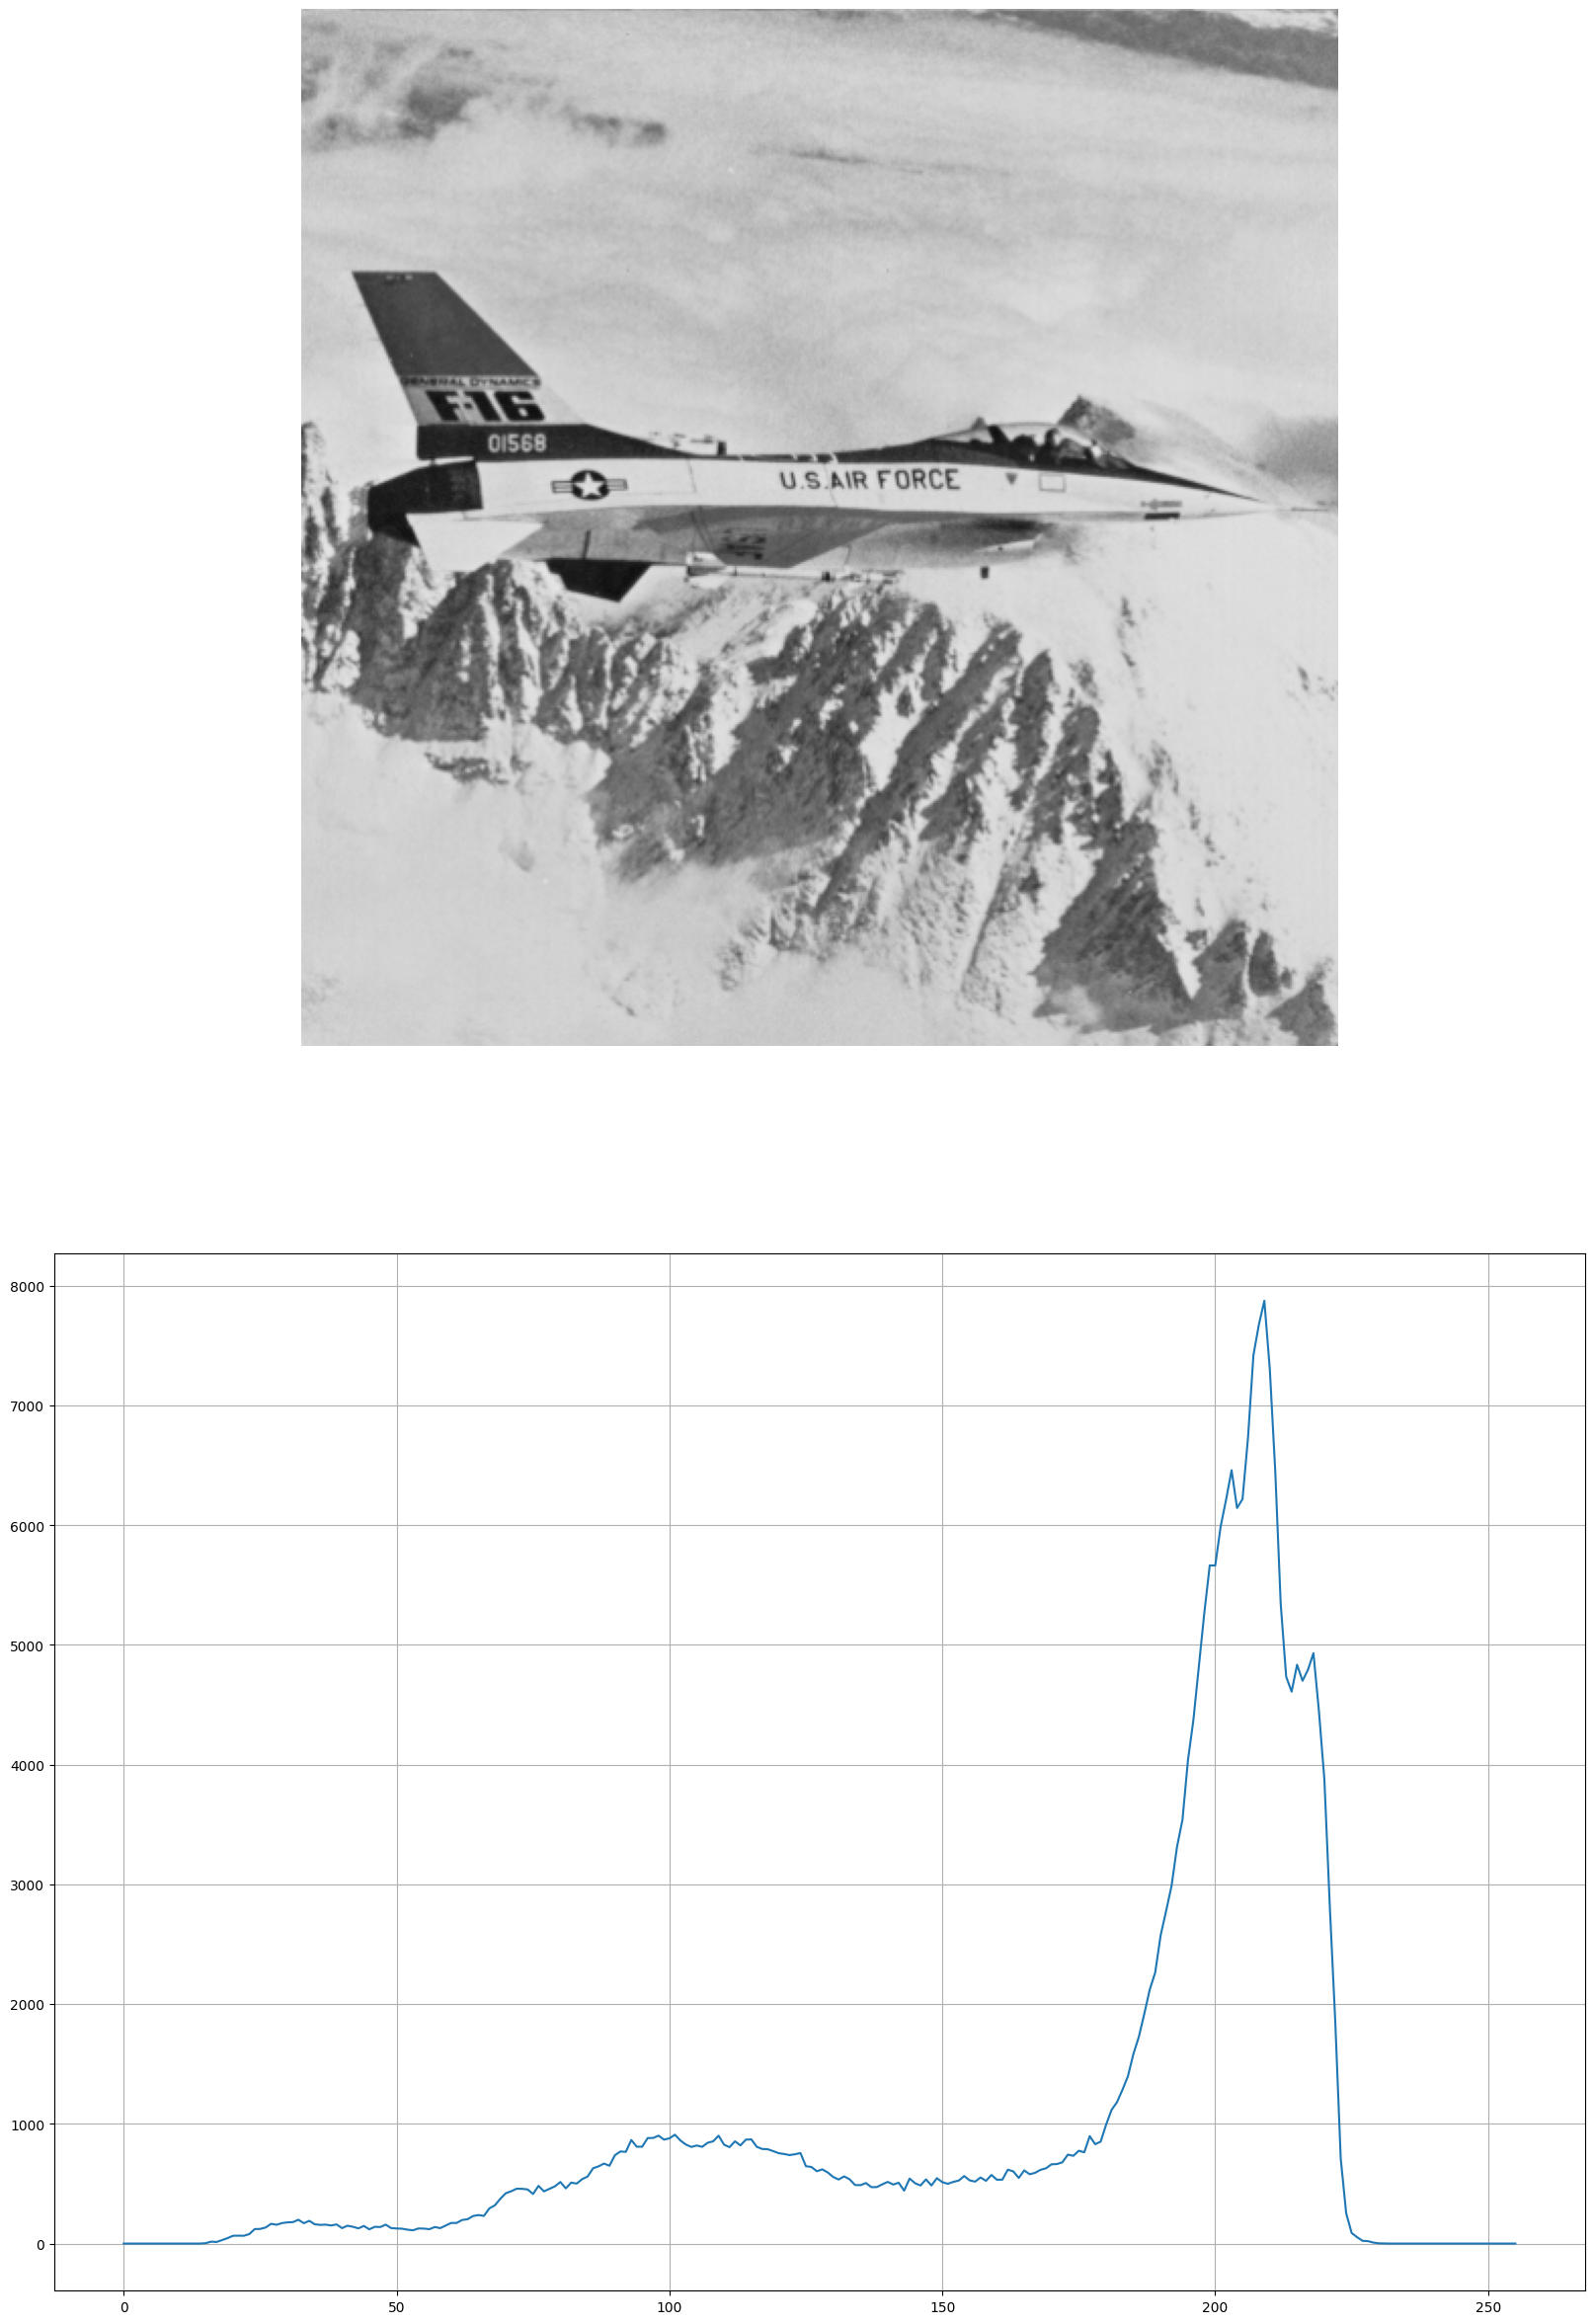

In [2]:
# 1.
I = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
H = cv2.calcHist([I], [0], None, [256], [0, 256])

hist, axs = plt.subplots(2, 1)
hist.set_size_inches(20, 30)
axs[0].imshow(I, 'gray', vmin=0, vmax=256)
axs[0].axis('off')
axs[1].plot(H)
axs[1].grid()

In [3]:
# 2.
lm = np.median(I).astype("uint8")
print(lm)

199


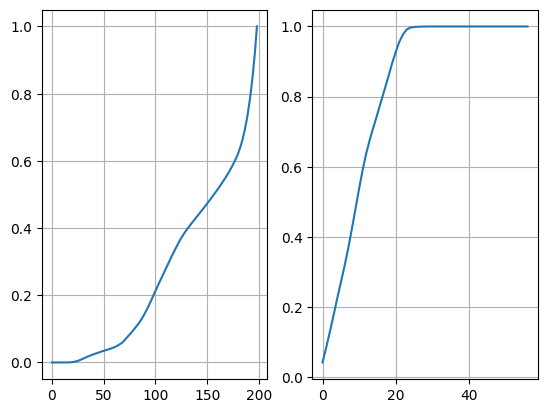

In [4]:
# 3. i 4.
H1 = H[:lm]
C1 = H1.cumsum()
C1 /= np.max(C1)

H2 = H[lm:]
C2 = H2.cumsum()
C2 /= np.max(C2)

hist, axs = plt.subplots(1, 2)

axs[0].plot(C1)
axs[0].grid()
axs[1].plot(C2)
axs[1].grid()

plt.show()

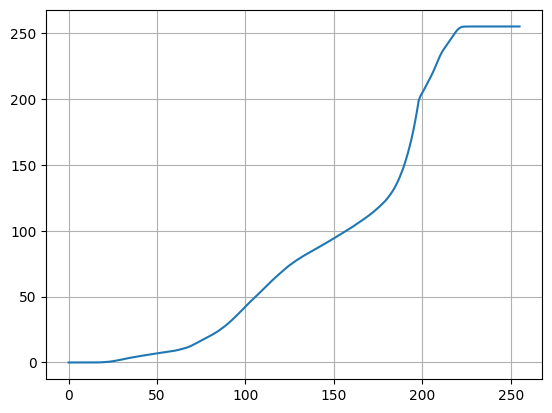

In [5]:
# 5.
C1n = lm * C1
C2n = lm + 1 + (255 - lm - 1) * C2

C = np.concatenate((C1n, C2n))

plt.plot(C)
plt.grid()

plt.show()

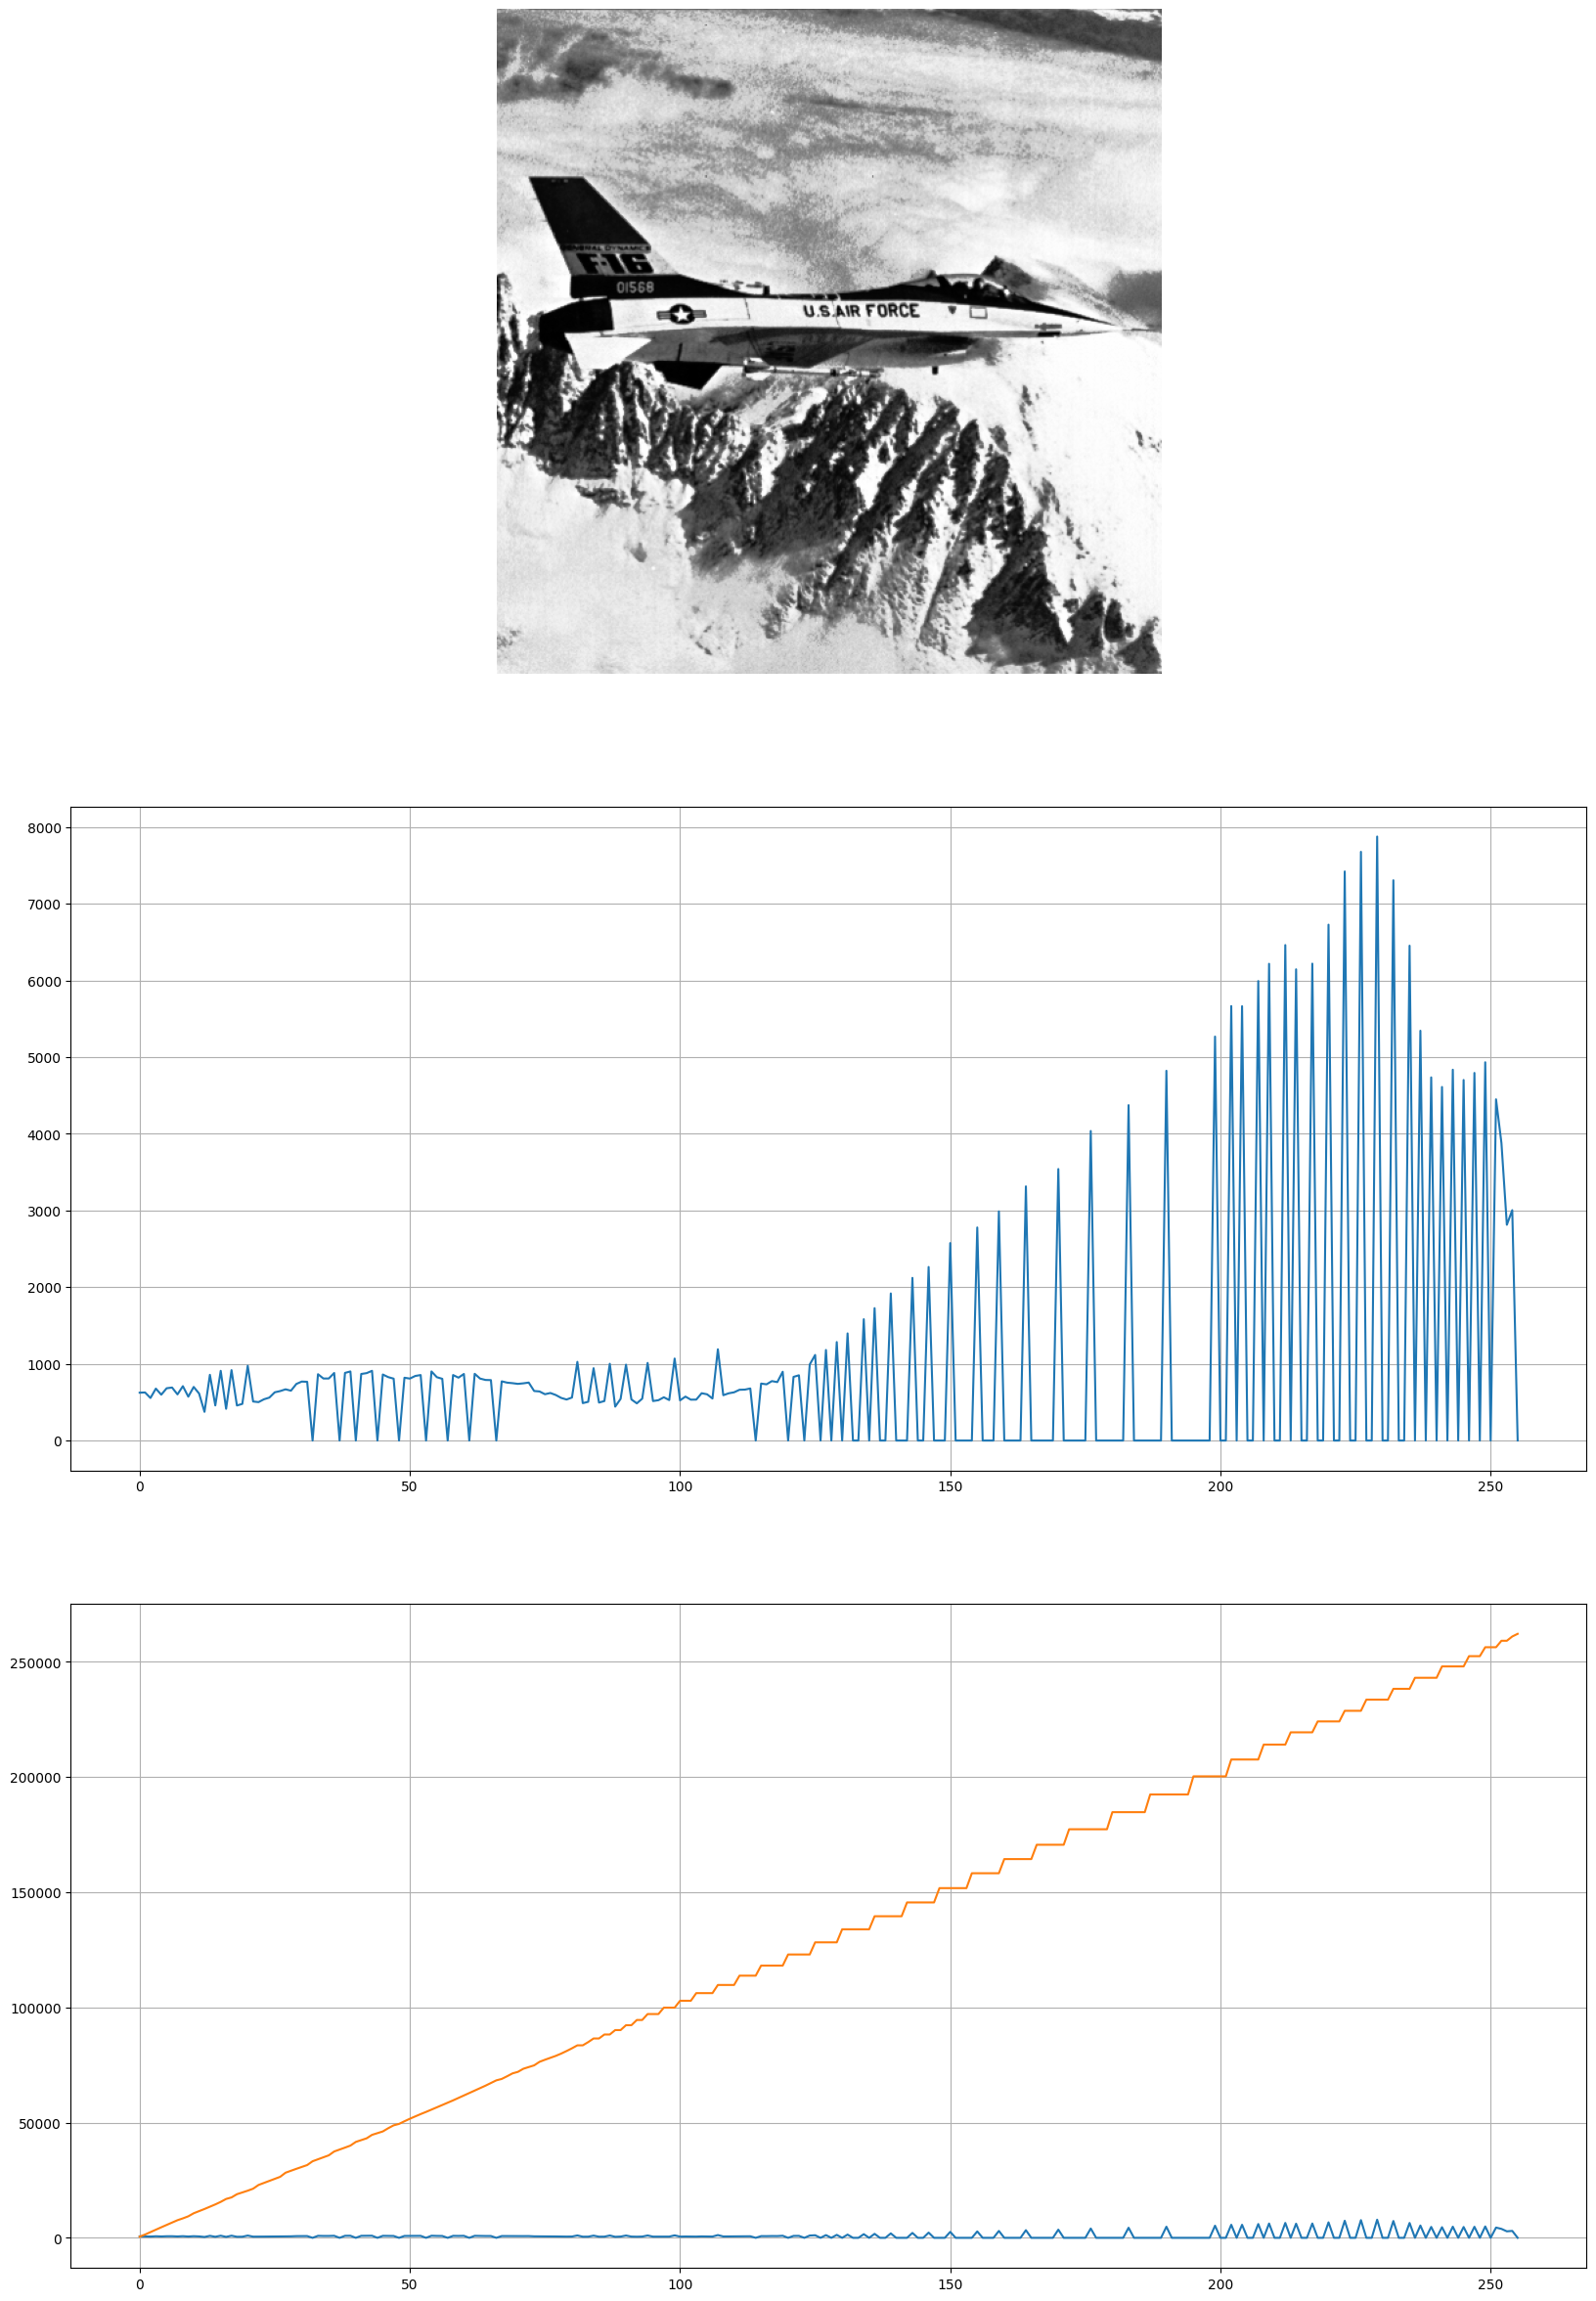

In [15]:
# 6.
ILUT = cv2.LUT(I, C)
HLUT = cv2.calcHist([ILUT], [0], None, [256], [0, 256])

IEQ = cv2.equalizeHist(I)
HEQ = cv2.calcHist([IEQ], [0], None, [256], [0, 256])
CHEQ = HEQ.cumsum()

hist, axs = plt.subplots(3, 1)
hist.set_size_inches(20, 30)
axs[0].imshow(ILUT, 'gray', vmin=0, vmax=256)
axs[0].axis('off')
axs[1].plot(HLUT)
axs[1].grid()
axs[2].plot(HLUT)
axs[2].plot(CHEQ)
axs[2].grid()

plt.show()